In [1]:
pip install pymysql 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pymysql 

In [3]:
import seaborn as sns 

In [4]:
import matplotlib.pyplot as plt 

In [5]:

import pandas as pd 
import warnings  
warnings.filterwarnings('ignore')


In [6]:
connection = pymysql.connect (host= 'localhost',user = 'root',password = '7978',database = 'capstone')
            

In [7]:
query = "select * from crime_data where vict_age>18"

In [8]:
 df = pd.read_sql(query,connection) 
df 

DR_NO   Date_Rptd    DATE_OCC    AREA_NAME  Crm_Cd  \
0     10304468  01-08-2020  01-08-2020    Southwest     624   
1    190101086  01-02-2020  01-01-2020      Central     624   
2    191501505  01-01-2020  01-01-2020  N Hollywood     745   
3    191921269  01-01-2020  01-01-2020      Mission     740   
4    200100502  01-02-2020  01-02-2020      Central     442   
..         ...         ...         ...          ...     ...   
396  200106606  02-07-2020  02-07-2020      Central     624   
397  200106614  02-07-2020  02-07-2020      Central     624   
398  200106615  02-07-2020  02-07-2020      Central     624   
399  200106616  02-07-2020  02-07-2020      Central     624   
400  200106618  02-07-2020  02-03-2020      Central     745   

                                           Crm_Cd_Desc  Vict_Age Vict_Sex  \
0                             BATTERY - SIMPLE ASSAULT        36        F   
1                             BATTERY - SIMPLE ASSAULT        25        M   
2             VANDALISM - MISDEAMEANOR ($399 OR UNDER)        76        F   
3    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        31        X   
4             SHOPLIFTING - PETTY THEFT ($950 & UNDER)        23        M   
..                                                 ...       ...      ...   
396                           BATTERY - SIMPLE ASSAULT        75        F   
397                           BATTERY - SIMPLE ASSAULT        33        M   
398                           BATTERY - SIMPLE ASSAULT        25        M   
399                           BATTERY - SIMPLE ASSAULT        35        M   
400           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        72        M   

                                      Premis_Desc Status            Location  \
0                          SINGLE FAMILY DWELLING     AO      1100 W 39TH PL   
1                                        SIDEWALK     IC       700 S HILL ST   
2    MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     IC     5400 CORTEEN PL   
3                             BEAUTY SUPPLY STORE     IC      14400 TITUS ST   
4                                DEPARTMENT STORE     IC   700 S FIGUEROA ST   
..                                            ...    ...                 ...   
396                                      SIDEWALK     IC   600 EXPOSITION BL   
397                                      SIDEWALK     IC   2400 ELLENDALE PL   
398                                      SIDEWALK     IC             39TH PL   
399                                   OTHER STORE     IC    2500 W VERNON AV   
400                      VEHICLE, PASSENGER/TRUCK     IC  2600 S FIGUEROA ST   

       LAT     LON  
0    34.01 -118.30  
1    34.05 -118.25  
2    34.17 -118.40  
3    34.22 -118.45  
4    34.05 -118.26  
..     ...     ...  
396  34.04 -118.24  
397  34.05 -118.26  
398  34.05 -118.26  
399  34.05 -118.25  
400  34.05 -118.24  

[401 rows x 13 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        401 non-null    int64  
 1   Date_Rptd    401 non-null    object 
 2   DATE_OCC     401 non-null    object 
 3   AREA_NAME    401 non-null    object 
 4   Crm_Cd       401 non-null    int64  
 5   Crm_Cd_Desc  401 non-null    object 
 6   Vict_Age     401 non-null    int64  
 7   Vict_Sex     401 non-null    object 
 8   Premis_Desc  401 non-null    object 
 9   Status       401 non-null    object 
 10  Location     401 non-null    object 
 11  LAT          401 non-null    float64
 12  LON          401 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 40.9+ KB


In [10]:
df.isnull().sum()

DR_NO          0
Date_Rptd      0
DATE_OCC       0
AREA_NAME      0
Crm_Cd         0
Crm_Cd_Desc    0
Vict_Age       0
Vict_Sex       0
Premis_Desc    0
Status         0
Location       0
LAT            0
LON            0
dtype: int64

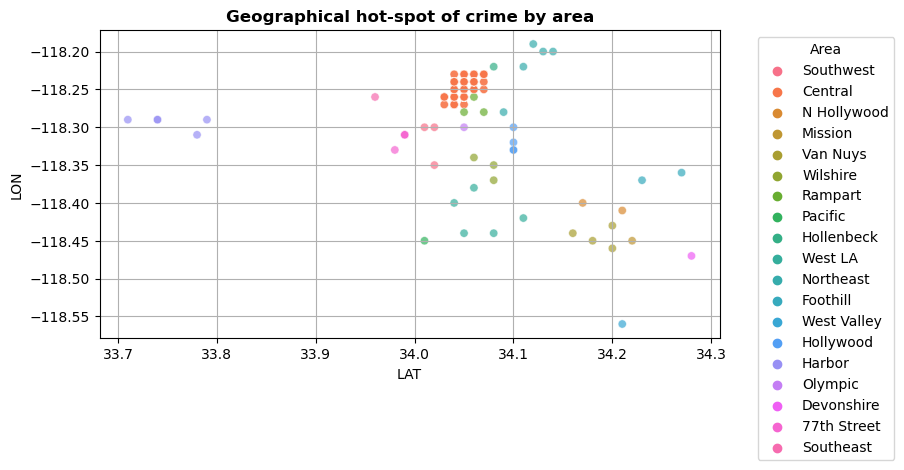

In [16]:
plt.figure(figsize=(8,4))            #Q1 - BLUE DOT INDICATE THE geographical hotspots for reported crimes AREA .

plt.title("Geographical hot-spot of crime by area",weight = 'bold') 
sns.scatterplot(x = df["LAT"], y =df["LON"],hue = df["AREA_NAME"],marker = 'o',alpha = 0.7)
plt.grid()
plt.legend(title="Area", bbox_to_anchor=(1.05, 1))
plt.show()


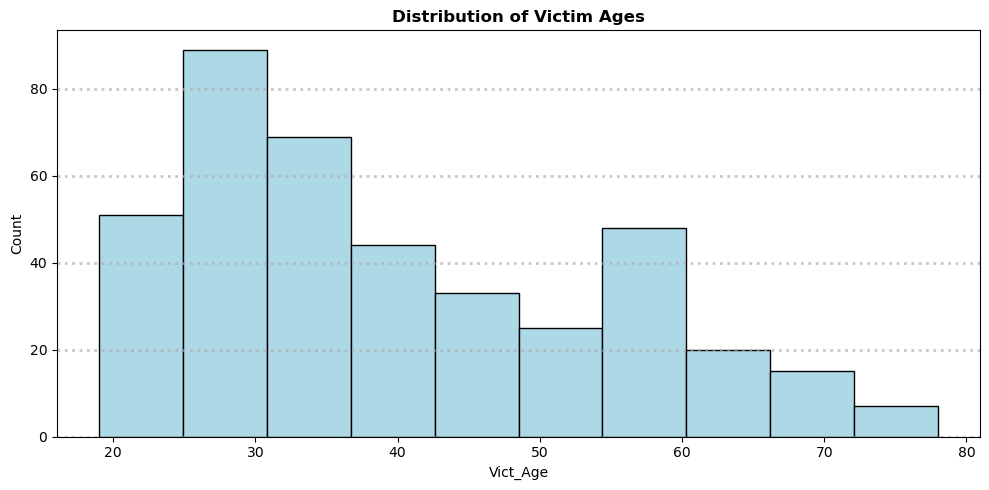

In [28]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Victim Ages",weight = 'bold') 
sns.histplot(x= df["Vict_Age"],facecolor = 'lightblue',edgecolor = 'black')
plt.grid(axis ='y',linestyle = 'dotted',alpha=0.7,lw=2)
plt.tight_layout()
plt.show()



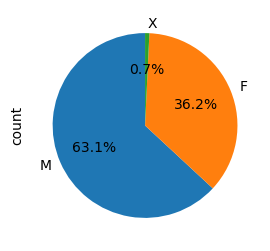

In [20]:
plt.figure(figsize = (7,3)) 
df['Vict_Sex'].value_counts().plot(kind = 'pie',autopct="%1.1f%%",startangle=90)  
plt.show()


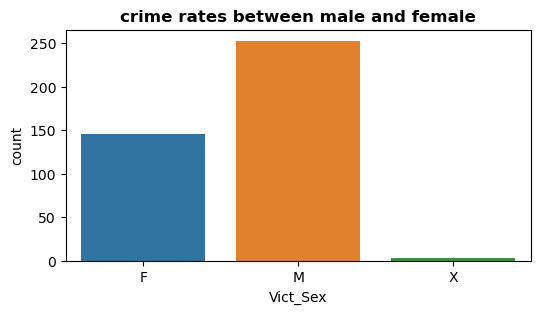

In [38]:
plt.figure(figsize=(6,3))
plt.title("crime rates between male and female",weight = 'bold')
sns.countplot(x=df["Vict_Sex"]) 
plt.show()


In [23]:
df['Crm_Cd'].value_counts()

Crm_Cd
330    77
624    72
440    40
230    24
341    23
442    21
740    17
745    17
310    13
888    11
480    10
354    10
350     9
210     8
930     7
761     5
662     5
220     4
901     3
625     2
850     2
648     2
351     2
946     2
420     2
886     2
900     2
755     1
940     1
647     1
421     1
320     1
623     1
666     1
956     1
343     1
Name: count, dtype: int64

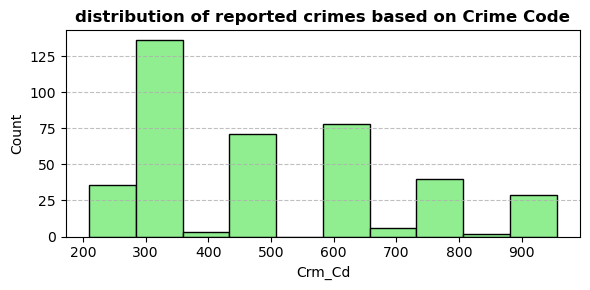

In [26]:
plt.figure(figsize=(6,3))
plt.title("distribution of reported crimes based on Crime Code",weight = 'bold')
sns.histplot(x=df["Crm_Cd"],facecolor = 'lightgreen',edgecolor = 'black',alpha = 1) 
plt.grid(axis= 'y',linestyle = '--',alpha = 0.8)
plt.tight_layout()
plt.show()


In [29]:



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   DR_NO        401 non-null    int64   
 1   Date_Rptd    401 non-null    object  
 2   DATE_OCC     401 non-null    object  
 3   AREA_NAME    401 non-null    object  
 4   Crm_Cd       401 non-null    int64   
 5   Crm_Cd_Desc  401 non-null    object  
 6   Vict_Age     401 non-null    int64   
 7   Vict_Sex     401 non-null    object  
 8   Premis_Desc  401 non-null    object  
 9   Status       401 non-null    object  
 10  Location     401 non-null    category
 11  LAT          401 non-null    float64 
 12  LON          401 non-null    float64 
dtypes: category(1), float64(2), int64(3), object(7)
memory usage: 49.0+ KB


<Figure size 1500x700 with 0 Axes>

In [32]:
q1 = "select location ,count(location) as location_crime from crime_data group by location order by 2 desc limit 5 ;"
df1 = pd.read_sql(q1,connection) 
print(df1)






             location  location_crime
0    800 N ALAMEDA ST              14
1        700 W 7TH ST              11
2        300 E 5TH ST               6
3  1100 S FIGUEROA ST               6
4                 6TH               6


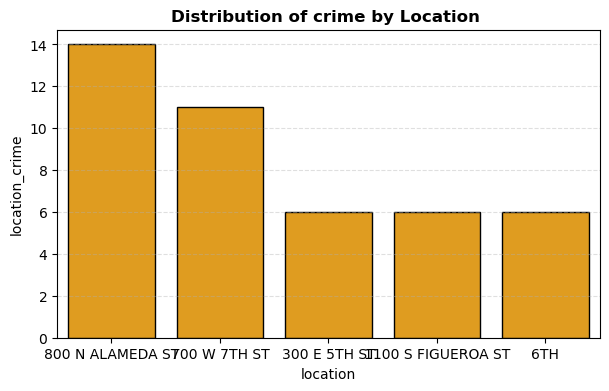

In [37]:
plt.figure(figsize=(7,4))
plt.title("Distribution of crime by Location ",weight = 'bold')
sns.barplot(x=df1['location'],y = df1['location_crime'],color = 'orange',edgecolor = 'k',alpha = 1)  
plt.grid(axis = 'y',linestyle = '--',alpha = 0.4)
plt.show()